#**SPRINT 3 - MACHINE LEARNING**


**GRUPO: Echo Script**

DISCENTES - RM :

Caiky de ávila Pereira Dutra (representante) - 99274


Giovanna Shiguemori Barbosa - 99105


Isabela Victória de Novais Romanato - 550234


Lucas Pinheiro de Souza - 99061


Yann Dantas - 550783


Orientador: ME. Fernando Nemec

# Licenças
* https://creativecommons.org/licenses/by-sa/4.0/
* https://github.com/MedidaSP/nomes-brasileiros-ibge/tree/master
* https://raw.githubusercontent.com/x4nth055/pythoncode-tutorials/master/machine-learning/customer-churn-detection/Churn_Modelling.csv

O novo conjunto de dados foi criado para complementar o projeto original, que anteriormente só contava com transcrições contendo perguntas, respostas e notas dos clientes. Esse dataset foi desenvolvido para oferecer uma visão mais detalhada dos clientes, incluindo informações como idade, permanência, número de produtos adquiridos, estado, sistema mais comprado, gênero, salário, despesas e saldo. Esses novos dados possibilitam uma análise mais aprofundada e a obtenção de insights sobre os produtos fornecidos pela TOTVS. Além disso, o dataset inclui a variável 'Y', que indica se o cliente abandonou ou não, permitindo uma melhor compreensão dos fatores que influenciam o abandono e, consequentemente, a adoção de estratégias para reduzir essa taxa.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
salarios = pd.read_csv('contracheque.csv')
df = pd.read_csv('churn_modelling.csv')
nome_mas = pd.read_csv('ibge-mas-10000.csv')
nome_fem = pd.read_csv('ibge-fem-10000.csv')
empresas = pd.read_csv('symbols_valid_meta.csv')

In [ ]:
salarios.dropna(inplace=True)
salarios = salarios[['rendimento_liquido', 'total_de_descontos']]
masculino = nome_mas.drop(['regiao', 'freq', 'rank'], axis=1)
feminino = nome_fem.drop(['regiao', 'freq', 'rank'], axis=1)
nomes = pd.concat([masculino, feminino])
salarios = salarios.sample(n=1000)
salarios.reset_index(drop=True, inplace=True)
nomes = nomes.sample(n=1000)
nomes.reset_index(drop=True, inplace=True)
empresas = empresas['Security Name']
empresas = empresas.sample(n=1000)
empresas.reset_index(drop=True, inplace=True)

In [ ]:
df = df.drop(['Geography','Gender', 'Surname', 'HasCrCard', 'EstimatedSalary', 'Balance'], axis=1)
estados = [
    "AC", "AL", "AP", "AM", "BA", "CE", "ES", "GO", "MA", "MT",
    "MS", "MG", "PA", "PB", "PR", "PE", "PI", "RJ", "RN", "RS",
    "RO", "RR", "SC", "SP", "SE", "TO"
]
estados_aleatorios = random.choices(estados, k=len(df))
df['Estado'] = estados_aleatorios
sistemas = ['ERP PROTHEUS', 'ERP DATASUL', 'ERP RM', 'ERP LOGIX']
sistemas_aleatorios = random.choices(sistemas, k=len(df))
df['Sistema mais comprado'] = sistemas_aleatorios
df = pd.concat([df, nomes, salarios, empresas], axis=1)
df.dropna(inplace=True)
df.rename(columns={'CustomerId': 'ClienteId', 'CreditScore': 'Score Credito', 'Age': 'Idade', 'Tenure': 'Permanencia',
                   'NumOfProducts': 'NumProdutos',
                   'IsActiveMember': 'Membro ativo', 'Exited': 'Abandono',
                   'nome': 'Nome', 'sexo': 'Genero', 'rendimento_liquido': 'Salario', 'total_de_descontos': 'Despesas', 'Security Name': 'Empresa'}, inplace=True)
df['Despesas'] = df['Despesas'].abs()
df['Saldo'] = df['Salario'] - df['Despesas']
df

,RowNumber,ClienteId,Score Credito,Idade,Permanencia,NumProdutos,Membro ativo,Abandono,Estado,Sistema mais comprado,Nome,Genero,Salario,Despesas,Empresa,Saldo
0,1,15634602,619,42,2,1,1,1,PA,ERP PROTHEUS,CLEDIA,F,25564.81,10836.55,Franklin FTSE Saudi Arabia ETF,14728.26
1,2,15647311,608,41,1,1,1,0,RN,ERP LOGIX,ADENALDO,M,24721.22,8595.24,IBERIABANK Corporation - Depositary Shares Rep...,16125.98
2,3,15619304,502,42,8,3,0,1,SC,ERP RM,RICAEL,M,66888.93,10742.89,"Blue Ridge Bankshares, Inc. Common Stock",56146.04
3,4,15701354,699,39,1,2,0,0,RN,ERP PROTHEUS,MASAKO,F,10433.69,4040.09,"Global Blood Therapeutics, Inc. - Common Stock",6393.60
4,5,15737888,850,43,2,1,1,0,RJ,ERP PROTHEUS,GALDINA,F,66682.54,15582.49,"Smart Sand, Inc. - Common Stock",51100.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,15810218,610,29,9,3,1,0,MT,ERP DATASUL,SURAMA,F,57014.36,15997.80,Sify Technologies Limited - American Depositor...,41016.56
996,997,15645621,811,44,3,2,1,0,AL,ERP DATASUL,JOANI,M,24953.95,8986.64,Amplitude Healthcare Acquisition Corporation -...,15967.31
997,998,15608114,587,62,7,1,1,0,RN,ERP RM,RICARDA,F,43147.28,19879.08,"Retractable Technologies, Inc. Common Stock",23268.20
998,999,15659557,811,28,4,2,1,0,GO,ERP PROTHEUS,ALFA,F,107274.46,12569.94,"Telephone and Data Systems, Inc. 6.875% Senior...",94704.52


In [ ]:
df.describe(exclude= ['O'])
df.describe(include = ['O'])

,Estado,Sistema mais comprado,Nome,Genero,Empresa
count,1000,1000,1000,1000,1000
unique,26,4,997,2,1000
top,PE,ERP RM,ADI,F,Franklin FTSE Saudi Arabia ETF
freq,56,263,2,506,1


In [ ]:
df.shape[0], df.ClienteId.nunique()

(1000, 1000)

In [ ]:
df['Abandono'].value_counts()

,count
Abandono,
0,796
1,204


In [ ]:
df.groupby(['Estado']).agg({'RowNumber': 'count', 'Abandono': 'mean'}
                           ).reset_index().sort_values(by='RowNumber', ascending=False)

,Estado,RowNumber,Abandono
14,PE,56,0.214286
2,AM,46,0.217391
0,AC,44,0.227273
9,MG,44,0.159091
22,SC,43,0.209302
11,MT,42,0.309524
1,AL,42,0.214286
17,RJ,40,0.150000
15,PI,39,0.179487
21,RS,39,0.128205


<Axes: ylabel='Score Credito'>

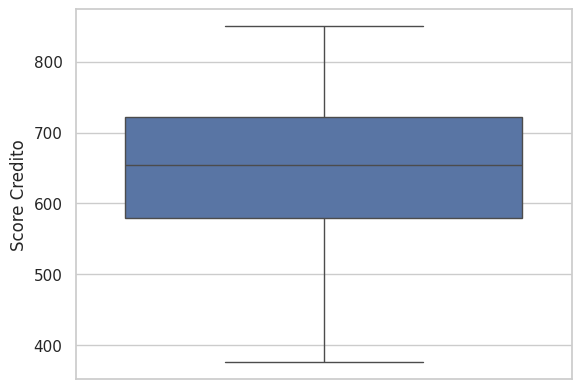

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(y=df['Score Credito'])

<Axes: ylabel='Idade'>

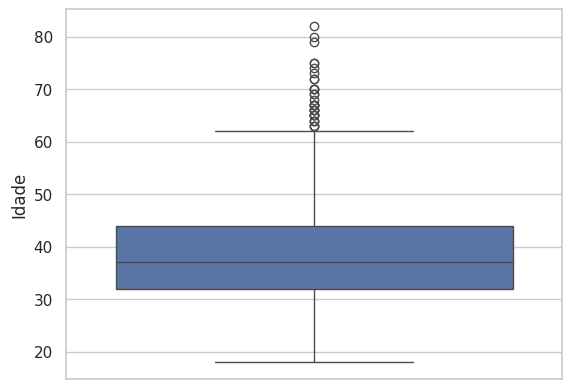

In [ ]:
sns.boxplot(y=df['Idade'])

<Axes: ylabel='Permanencia'>

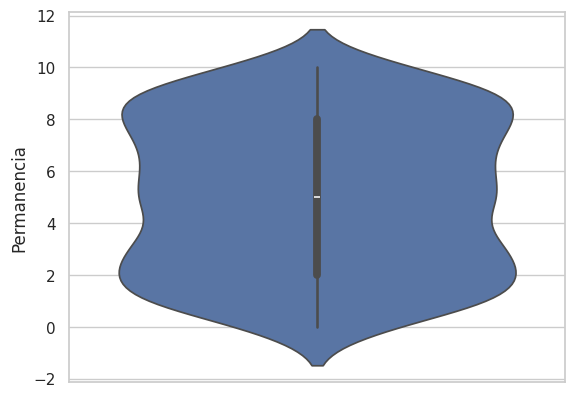

In [ ]:
sns.violinplot(y= df.Permanencia)

<Axes: ylabel='Saldo'>

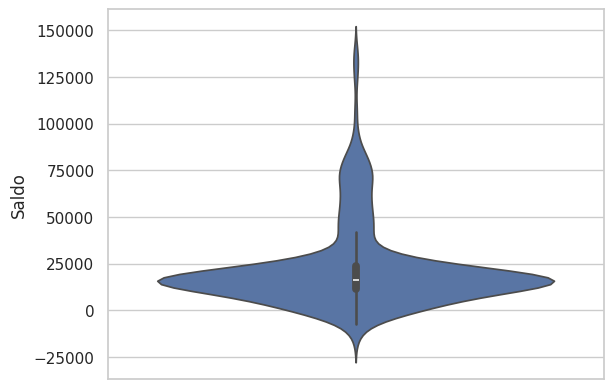

In [ ]:
sns.violinplot(y= df.Saldo)

<Axes: xlabel='NumProdutos', ylabel='count'>

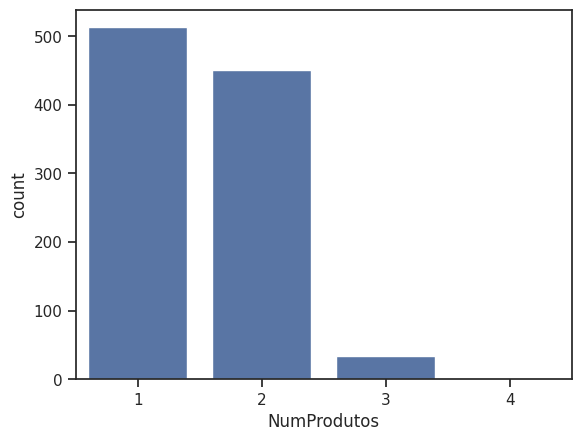

In [ ]:
sns.set(style= 'ticks')
sns.countplot(x='NumProdutos', data=df)

<Axes: xlabel='Salario', ylabel='Density'>

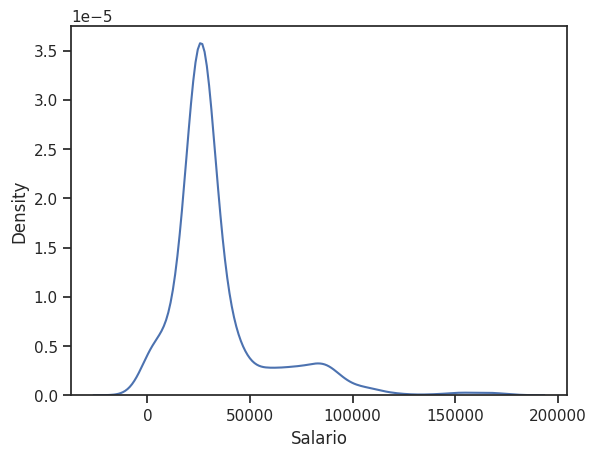

In [ ]:
sns.kdeplot(df['Salario'])

In [ ]:
# alvo = ['Abandono']

In [ ]:
df['Membro ativo'] = df['Membro ativo'].apply(lambda x: 'Sim' if x == 1 else 'Não')
df['Abandono'] = df['Abandono'].apply(lambda x: 'Sim' if x == 1 else 'Não')
df['Genero'] = df['Genero'].apply(lambda x: 1 if x == 'F' else 0)
df.replace({'Sim': 1, 'Não': 0}, inplace=True)
df.to_csv('Score.csv', sep=',', index=False)
df

,RowNumber,ClienteId,Score Credito,Idade,Permanencia,NumProdutos,Membro ativo,Abandono,Estado,Sistema mais comprado,Nome,Genero,Salario,Despesas,Empresa,Saldo
0,1,15634602,619,42,2,1,1,1,PA,ERP PROTHEUS,CLEDIA,1,25564.81,10836.55,Franklin FTSE Saudi Arabia ETF,14728.26
1,2,15647311,608,41,1,1,1,0,RN,ERP LOGIX,ADENALDO,0,24721.22,8595.24,IBERIABANK Corporation - Depositary Shares Rep...,16125.98
2,3,15619304,502,42,8,3,0,1,SC,ERP RM,RICAEL,0,66888.93,10742.89,"Blue Ridge Bankshares, Inc. Common Stock",56146.04
3,4,15701354,699,39,1,2,0,0,RN,ERP PROTHEUS,MASAKO,1,10433.69,4040.09,"Global Blood Therapeutics, Inc. - Common Stock",6393.60
4,5,15737888,850,43,2,1,1,0,RJ,ERP PROTHEUS,GALDINA,1,66682.54,15582.49,"Smart Sand, Inc. - Common Stock",51100.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,15810218,610,29,9,3,1,0,MT,ERP DATASUL,SURAMA,1,57014.36,15997.80,Sify Technologies Limited - American Depositor...,41016.56
996,997,15645621,811,44,3,2,1,0,AL,ERP DATASUL,JOANI,0,24953.95,8986.64,Amplitude Healthcare Acquisition Corporation -...,15967.31
997,998,15608114,587,62,7,1,1,0,RN,ERP RM,RICARDA,1,43147.28,19879.08,"Retractable Technologies, Inc. Common Stock",23268.20
998,999,15659557,811,28,4,2,1,0,GO,ERP PROTHEUS,ALFA,1,107274.46,12569.94,"Telephone and Data Systems, Inc. 6.875% Senior...",94704.52


In [ ]:
df1 = df.copy()
del df1['RowNumber']
del df1['ClienteId']
del df1['Estado']
del df1['Nome']
del df1['Empresa']
del df1['Sistema mais comprado']
df1

,Score Credito,Idade,Permanencia,NumProdutos,Membro ativo,Abandono,Genero,Salario,Despesas,Saldo
0,619,42,2,1,1,1,1,25564.81,10836.55,14728.26
1,608,41,1,1,1,0,0,24721.22,8595.24,16125.98
2,502,42,8,3,0,1,0,66888.93,10742.89,56146.04
3,699,39,1,2,0,0,1,10433.69,4040.09,6393.60
4,850,43,2,1,1,0,1,66682.54,15582.49,51100.05
...,...,...,...,...,...,...,...,...,...,...
995,610,29,9,3,1,0,1,57014.36,15997.80,41016.56
996,811,44,3,2,1,0,0,24953.95,8986.64,15967.31
997,587,62,7,1,1,0,1,43147.28,19879.08,23268.20
998,811,28,4,2,1,0,1,107274.46,12569.94,94704.52


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

features = ['Score Credito', 'Idade', 'Permanencia', 'NumProdutos',
            'Saldo', 'Genero', 'Membro ativo']
target = 'Abandono'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print(f'Matriz de Confusão:\n {conf_matrix}')
print(f'Relatório de Classificação:\n {class_report}')


Acurácia: 0.775
Matriz de Confusão:
 [[151   5]
 [ 40   4]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87       156
           1       0.44      0.09      0.15        44

    accuracy                           0.78       200
   macro avg       0.62      0.53      0.51       200
weighted avg       0.71      0.78      0.71       200



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Árvore de Decisão
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# Avaliação da Árvore de Decisão
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_conf_matrix = confusion_matrix(y_test, tree_pred)
tree_class_report = classification_report(y_test, tree_pred)

print("----- Árvore de Decisão -----")
print(f'Acurácia: {tree_accuracy}')
print(f'Matriz de Confusão:\n {tree_conf_matrix}')
print(f'Relatório de Classificação:\n {tree_class_report}')

----- Árvore de Decisão -----
Acurácia: 0.78
Matriz de Confusão:
 [[134  22]
 [ 22  22]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       156
           1       0.50      0.50      0.50        44

    accuracy                           0.78       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.78      0.78      0.78       200



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Avaliação do Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_class_report = classification_report(y_test, rf_pred)

print("----- Random Forest -----")
print(f'Acurácia: {rf_accuracy}')
print(f'Matriz de Confusão:\n {rf_conf_matrix}')
print(f'Relatório de Classificação:\n {rf_class_report}')


----- Random Forest -----
Acurácia: 0.845
Matriz de Confusão:
 [[151   5]
 [ 26  18]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       156
           1       0.78      0.41      0.54        44

    accuracy                           0.84       200
   macro avg       0.82      0.69      0.72       200
weighted avg       0.84      0.84      0.83       200



  Analisando os resultados dos três modelos de machine learning — Regressão Logística, Árvore de Decisão, e Random Forest — podemos notar diferenças significativas em termos de desempenho. O modelo de Random Forest apresentou a melhor acurácia, com um valor de 0.845, seguido pela Árvore de Decisão com uma acurácia de 0.78 e, finalmente, a Regressão Logística com uma acurácia de 0.775. Esses valores indicam que o Random Forest tem um melhor desempenho geral em prever corretamente tanto as classes positivas quanto as negativas.

  A Matriz de Confusão para cada modelo revela como eles classificam os dados. O Random Forest mostrou um bom equilíbrio entre as previsões corretas das duas classes, com 151 verdadeiros negativos e 18 verdadeiros positivos. No entanto, ele ainda apresentou 26 falsos negativos, indicando algumas dificuldades em identificar corretamente a classe positiva. Em comparação, a Árvore de Decisão teve um número maior de falsos positivos (22) e falsos negativos (22), sugerindo que é menos eficaz em comparação ao Random Forest. A Regressão Logística, por outro lado, mostrou uma maior quantidade de falsos negativos (40) e poucos verdadeiros positivos (4), destacando uma baixa eficácia em prever a classe positiva.

  Em termos de métricas de classificação, o Random Forest também se destaca com melhores valores de precisão, recall, e f1-score para ambas as classes. Em particular, o f1-score para a classe positiva (1) foi de 0.54 para o Random Forest, significativamente melhor que o da Árvore de Decisão (0.50) e muito superior ao da Regressão Logística (0.15). Isso sugere que o Random Forest é o modelo mais adequado para este conjunto de dados, especialmente se o objetivo é maximizar a identificação correta de clientes que irão "Abandonar", representados pela classe 1.